In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from collections import OrderedDict
from itertools import product
import h5py
import numpy as np
from scipy.stats import pearsonr

In [3]:
from tang_jcompneuro.model_fitting_postprocess import load_model_performance

In [4]:
from tang_jcompneuro.cnn_exploration_pytorch import get_num_params

In [5]:
debug_file = '/home/yimengzh/tang_jcompneuro/results/models/cnn_fitting_shape_cv.hdf5'

In [10]:
get_num_params()

OrderedDict([('k9c3_nobn_k8s4max_vanilla', 259),
             ('k9c3_nobn_k8s4max_dropout', 259),
             ('k9c3_nobn_k6s6max_vanilla', 259),
             ('k9c3_nobn_k6s6max_dropout', 259),
             ('k9c3_nobn_k6s2max_vanilla', 295),
             ('k9c3_nobn_k6s2max_dropout', 295),
             ('k9c3_nobn_k3s3max_vanilla', 295),
             ('k9c3_nobn_k3s3max_dropout', 295),
             ('k9c3_nobn_nopool_factored', 394),
             ('k9c6_nobn_k8s4max_vanilla', 517),
             ('k9c6_nobn_k8s4max_dropout', 517),
             ('k9c6_nobn_k6s6max_vanilla', 517),
             ('k9c6_nobn_k6s6max_dropout', 517),
             ('k9c6_nobn_k6s2max_vanilla', 589),
             ('k9c6_nobn_k6s2max_dropout', 589),
             ('k9c6_nobn_k3s3max_vanilla', 589),
             ('k9c6_nobn_k3s3max_dropout', 589),
             ('k9c6_nobn_nopool_factored', 643),
             ('k9c9_nobn_k8s4max_vanilla', 775),
             ('k9c9_nobn_k8s4max_dropout', 775),
             ('k9c9_

In [6]:
mapping_dict = OrderedDict()

# some duplicate for b.1 and b.2

mapping_dict['b.1'] = ('0/baseline@nonlinear_type,ReLU+num_filter,6@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@middle_decay')

mapping_dict['b.2'] = ('0/baseline@nonlinear_type,ReLU+num_filter,6@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@middle_decay')


#mapping_dict['0/baseline@nonlinear_type,ReLU+num_filter,3@baseline'] = 'b.3'
mapping_dict['b.3'] = ('0/baseline@nonlinear_type,ReLU+num_filter,6@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@middle_decay')

mapping_dict['b.4'] = ('0/baseline@nonlinear_type,ReLU+num_filter,6@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@middle_decay')


mapping_dict['b.5'] = ('0/baseline@nonlinear_type,ReLU+num_filter,6@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,6@middle_decay')


# maybe it's fine to use b.9 model now, whose performance exceeds that of 6.
mapping_dict['b.6'] = ('0/baseline@nonlinear_type,ReLU+num_filter,12@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,12@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,12@middle_decay')

mapping_dict['b.7'] = ('0/baseline@nonlinear_type,ReLU+num_filter,12@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,12@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,12@middle_decay')

mapping_dict['b.8'] = ('0/baseline@nonlinear_type,ReLU+num_filter,12@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,12@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,12@middle_decay')

mapping_dict['b.9'] = ('0/baseline@nonlinear_type,ReLU+num_filter,18@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,18@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,18@middle_decay')

mapping_dict['b.10'] = ('0/baseline@nonlinear_type,ReLU+num_filter,18@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,18@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,18@middle_decay')

mapping_dict['b.11'] = ('0/baseline@nonlinear_type,ReLU+num_filter,18@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,18@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,18@middle_decay')

mapping_dict['b.12'] = ('0/baseline@nonlinear_type,ReLU+num_filter,24@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,24@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,24@middle_decay')

mapping_dict['b.15'] = ('0/baseline@nonlinear_type,ReLU+num_filter,30@baseline',
            '0/baseline@nonlinear_type,ReLU+num_filter,30@adam_longer',
            '0/baseline@nonlinear_type,ReLU+num_filter,30@middle_decay')

subsets_to_check = ('all', 'OT')
datasets_to_check = ('MkA_Shape', 'MkE2_Shape')

In [7]:
def show_one_case(score_old, score_new, title):
    plt.close('all')
    plt.figure()
    plt.scatter(score_old, score_new)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot([0,1], [0,1], linestyle='--', color='r')
    plt.title(title + ' ' + 'old {:.3f}, new {:.3f}, corr {:.3f}'.format(score_old.mean(), score_new.mean(),
                                                            pearsonr(score_old, score_new)[0]))
    plt.xlabel('old')
    plt.ylabel('new')
    plt.axis('equal')
    plt.show()

In [8]:
def check_all():
    for dataset, subset in product(datasets_to_check, subsets_to_check):
        print(dataset, subset)
        
        num_param_factor_all = []
        score_all = []
        
        for new_model, old_model_list in mapping_dict.items():
            
            
            assert isinstance(old_model_list, tuple)
            with h5py.File(debug_file, 'r') as f_old:
                score_old = np.array([f_old[old_model +
                                            f'/{dataset}/{subset}/cv_score'][...].mean(axis=1) for old_model in old_model_list])
            score_old = score_old.max(axis=0)    
            score_new = np.asarray(
                [load_model_performance(dataset, subset, 100, s, 'cnn', new_model)['corr'] for s in range(2)]
            ).mean(axis=0)
            assert score_new.shape == score_old.shape and score_new.ndim == 1
            assert np.all(np.isfinite(score_new)) and np.all(np.isfinite(score_old))
            
            show_one_case(score_old, score_new, new_model)
            
            num_param_factor_all.append(int(new_model.split('.')[1]))
            score_all.append(score_new.mean())
            
        plt.close('all')
        plt.figure(figsize=(15, 8))
        plt.plot(num_param_factor_all, score_all, marker='x')
        plt.xlim(0,19) # I will test a 18 channel one as well.
        plt.ylim(0,1)
        plt.axhline(y=max(score_all), linestyle='--')
        plt.xlabel('param_factor')
        plt.ylabel('score')
        plt.show()

MkA_Shape all


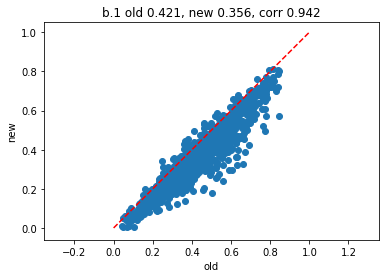

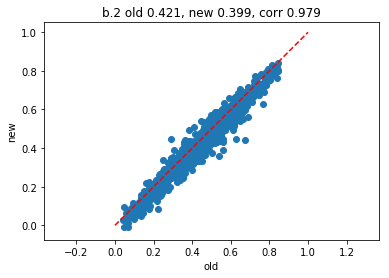

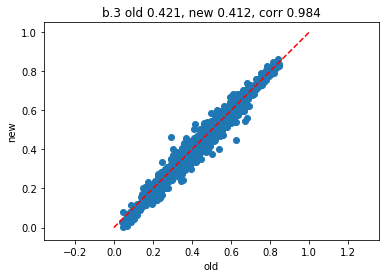

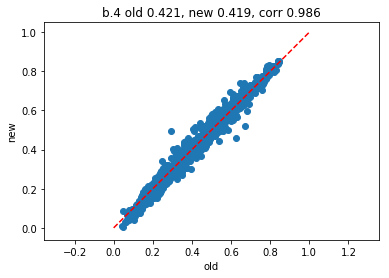

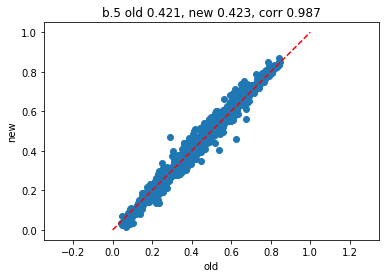

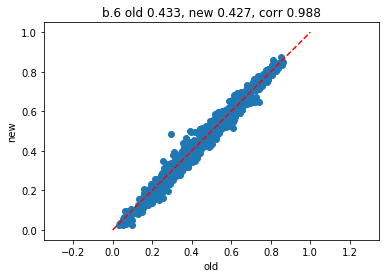

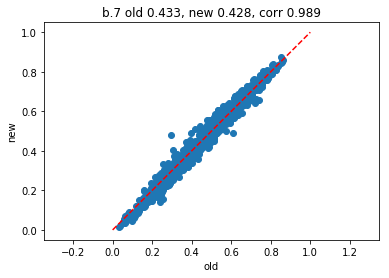

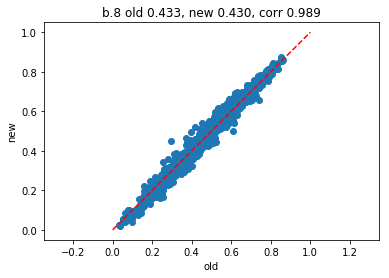

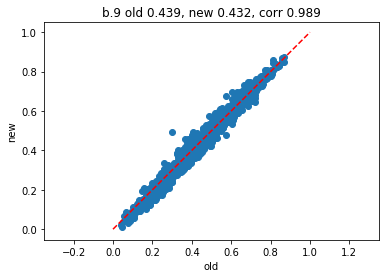

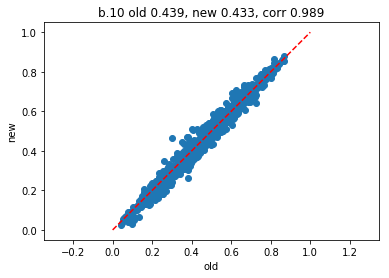

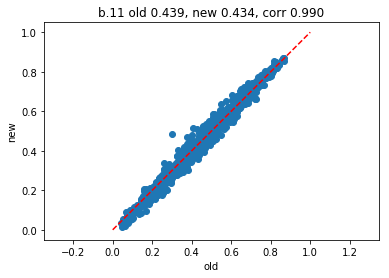

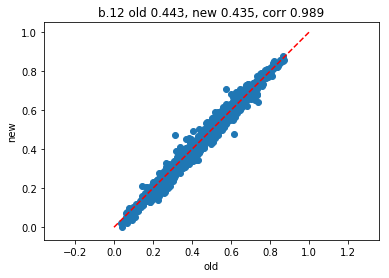

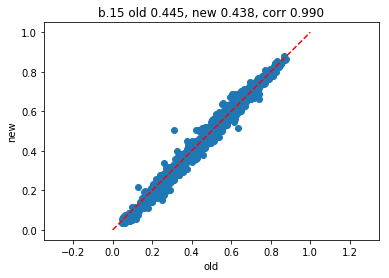

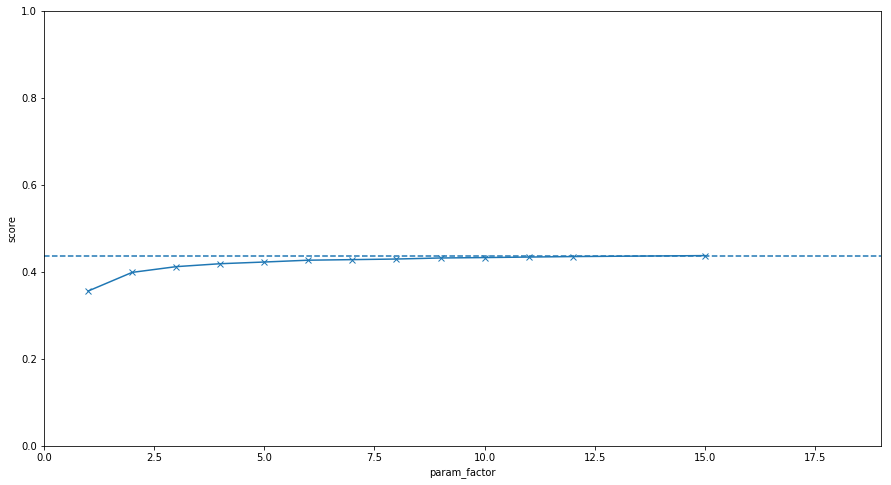

MkA_Shape OT


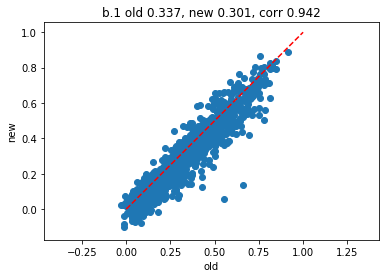

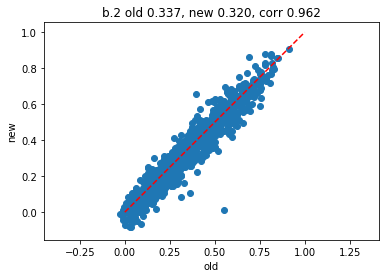

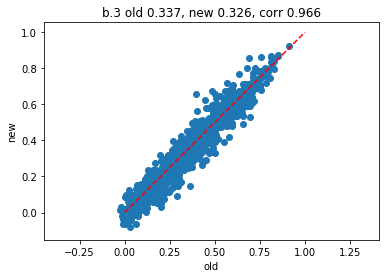

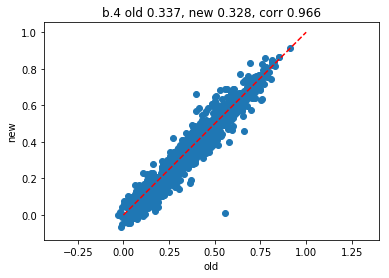

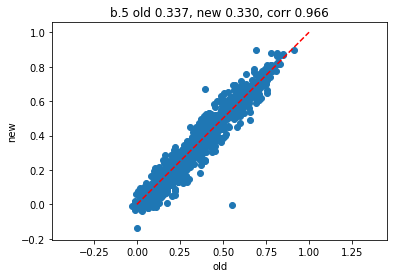

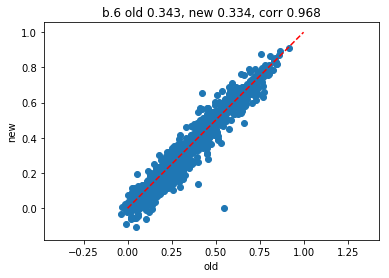

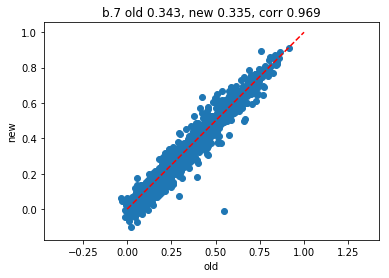

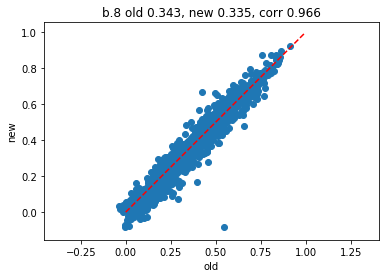

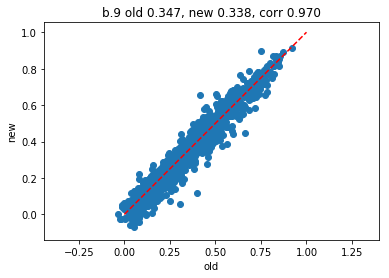

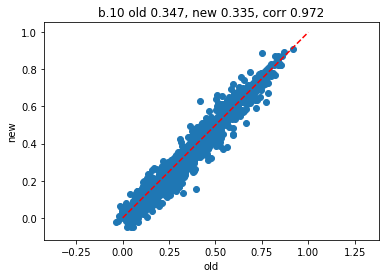

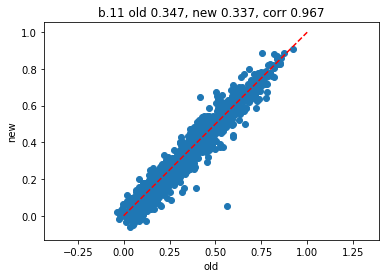

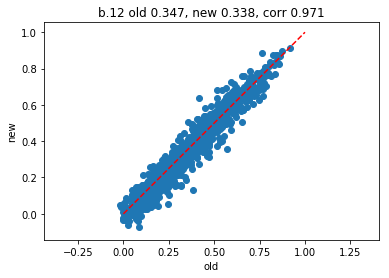

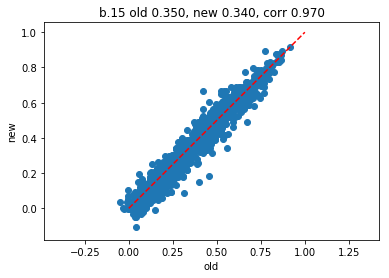

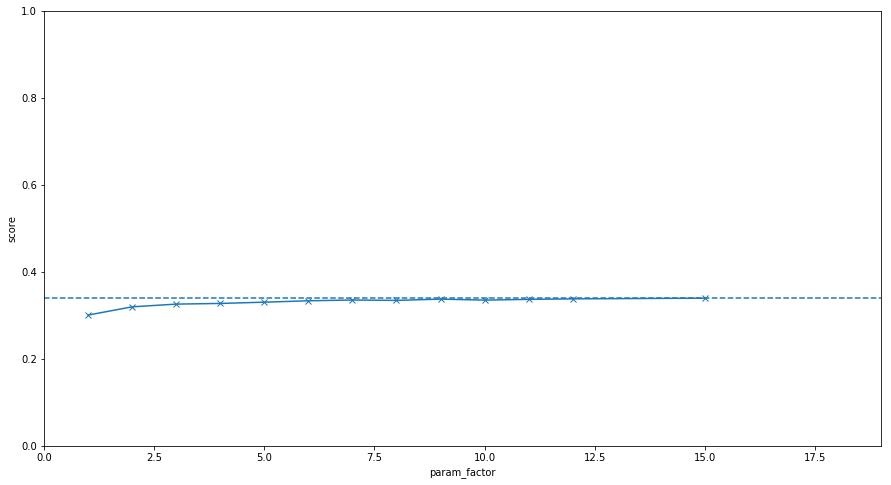

MkE2_Shape all


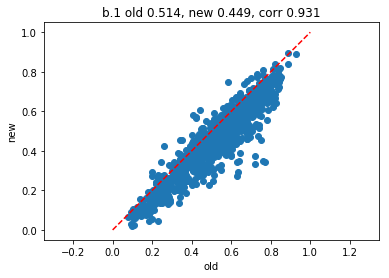

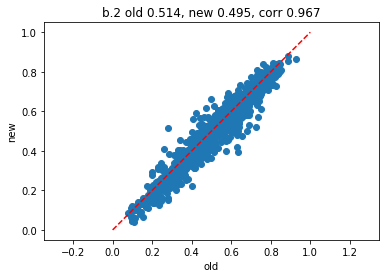

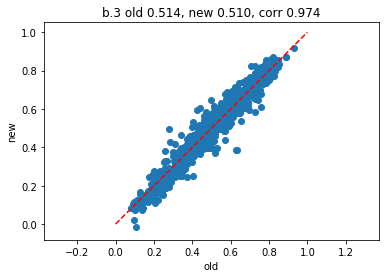

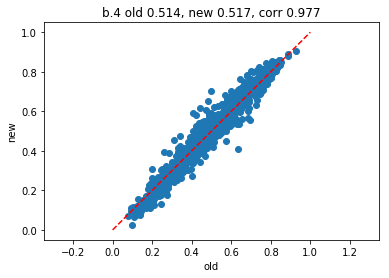

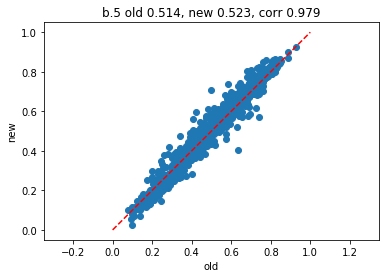

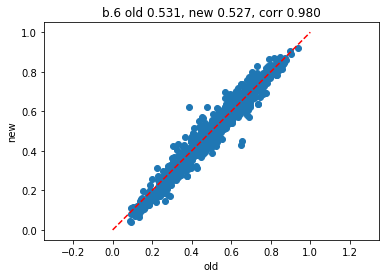

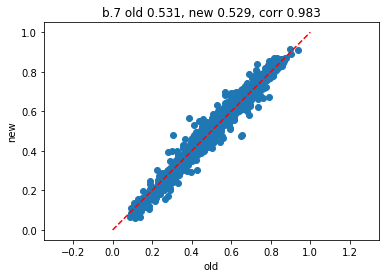

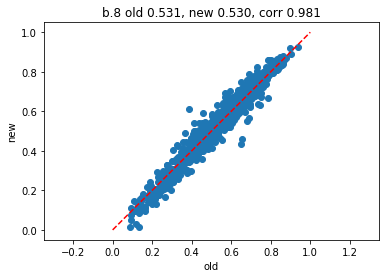

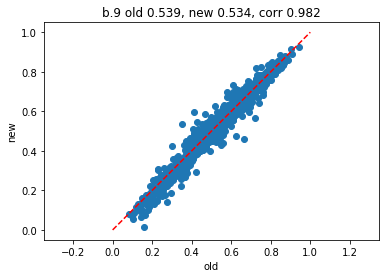

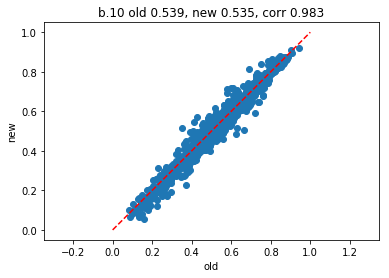

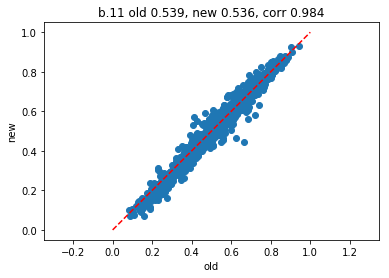

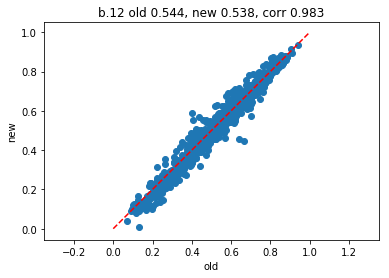

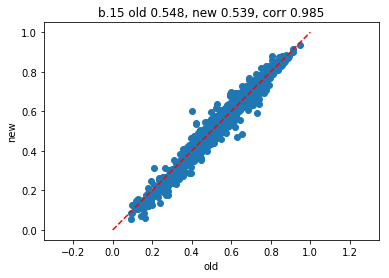

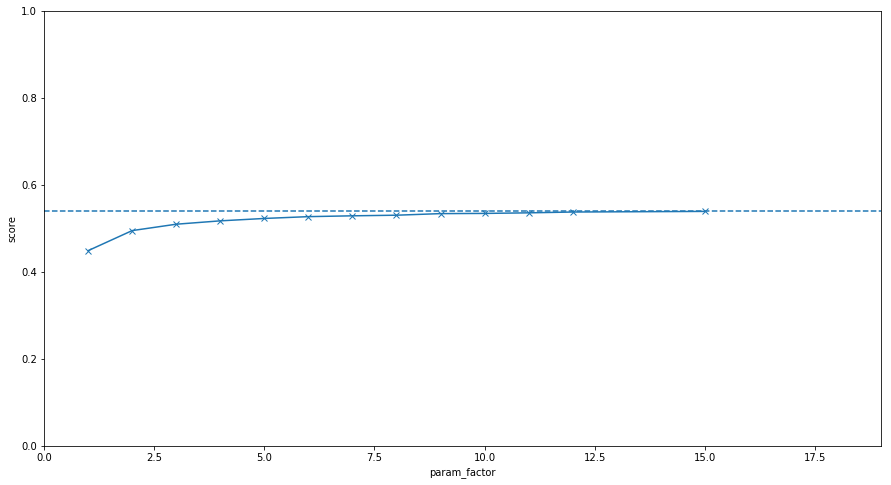

MkE2_Shape OT


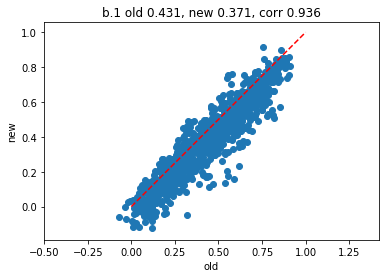

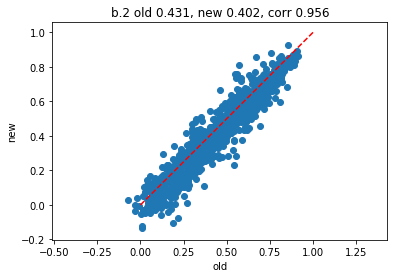

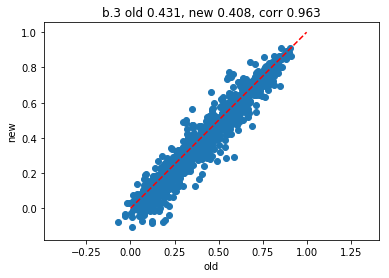

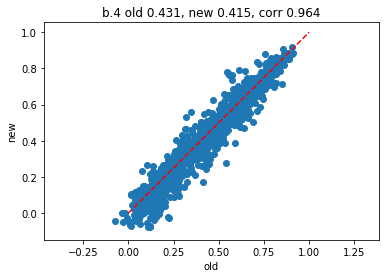

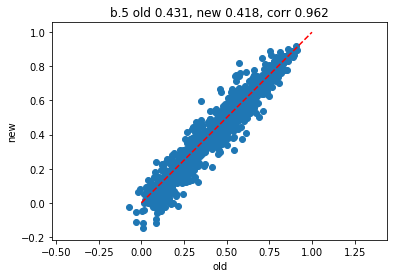

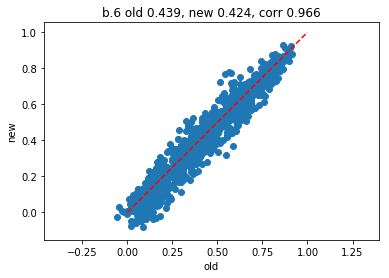

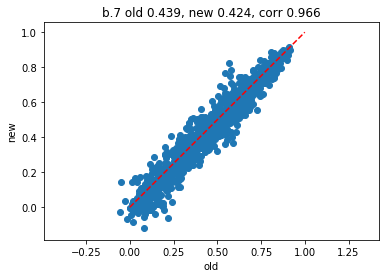

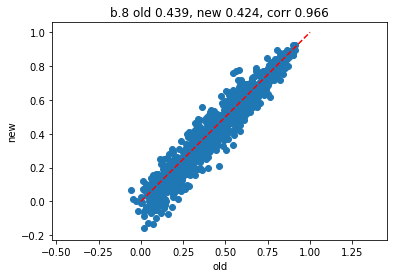

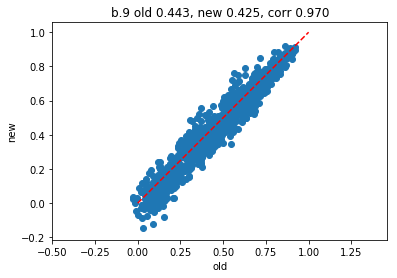

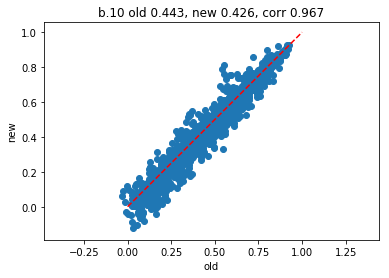

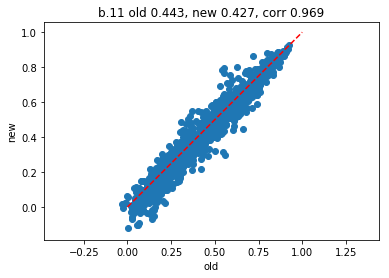

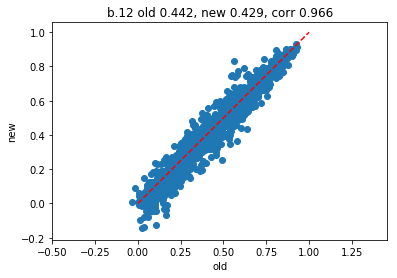

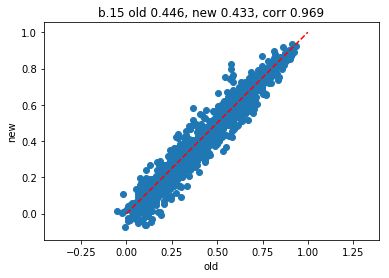

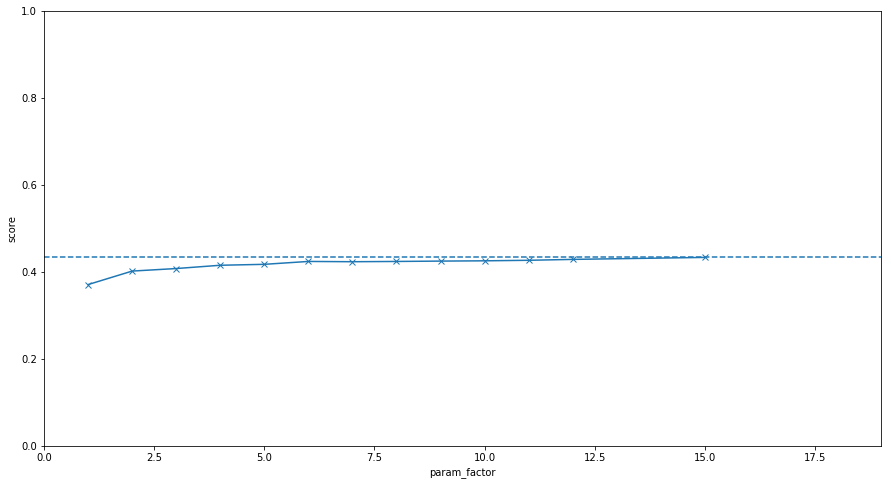

In [9]:
check_all()